<img src="udc1.png" alt="UDC"/>

# Notebook pour la classification d'images(déchets). 

### 1. Importation des bibliothèques(importation et pré-traitement).

In [32]:
import outils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_public = outils.Load_data.load_object("dataset2.zip")

In [3]:
df_local = outils.Load_data.load_object("validation.zip")

In [ ]:
#df.restore_data()

In [4]:
df_public.encodage()

In [5]:
(X_train_pb, y_train_pb), (X_test_pb, y_test_pb) = df_public.create_data(test_size=0.2)

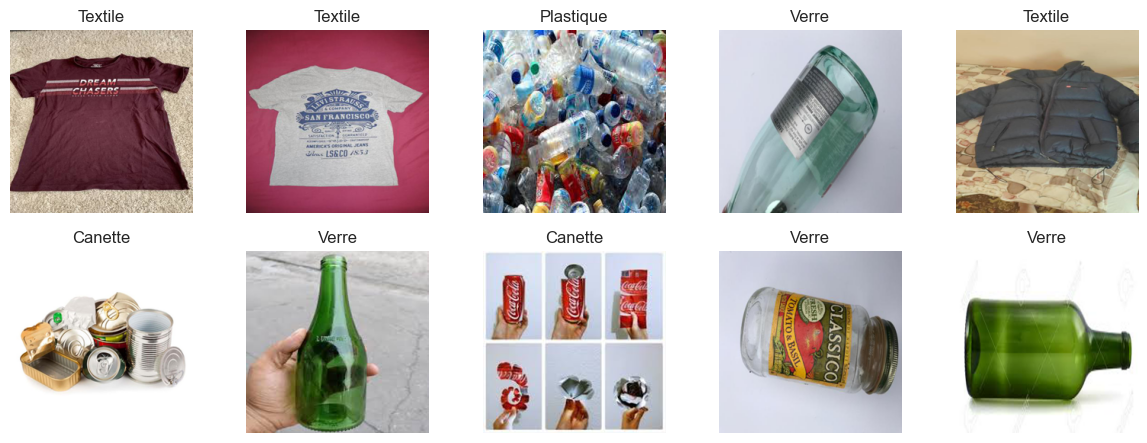

In [6]:
df_public.plot()

In [7]:
df_local.encodage()

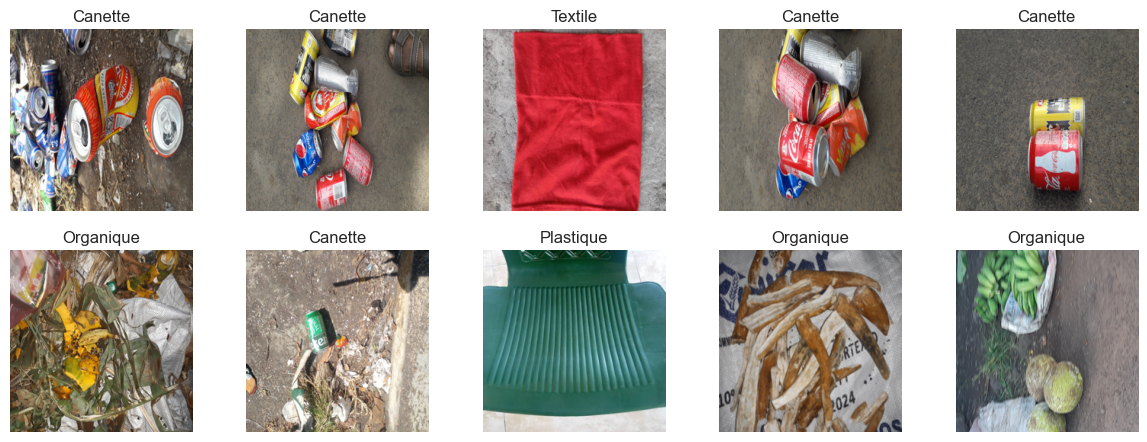

In [8]:
df_local.plot()

In [9]:
(X_train_lc, y_train_lc), (X_test_lc, y_test_lc) = df_local.create_data(test_size=0.3)

In [10]:
y_train_lc.shape

(377,)

In [33]:
X_selct, y_select = outils.select_data(X_train = X_train_pb, y_train = y_train_pb, n = 200, random_state = 40)

In [12]:
X_selct.shape

(1000, 240, 240, 3)

In [34]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_selct, y_select, test_size = 0.2, random_state= 40)

In [43]:
y_train_.shape

(800,)

In [51]:
X_test_.shape

(362, 240, 240, 3)

In [14]:
print(np.unique(y_train_,return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int32), array([164, 165, 161, 152, 158]))


In [48]:
X_train_t, y_train_t, X_test_t, y_test_t = outils.concat_datasets(X_train_, 
                                                              y_train_,
                                                              X_test_, 
                                                              y_test_,
                                                              X_train_lc,
                                                              y_train_lc, 
                                                              X_test_lc,
                                                              y_test_lc)

In [49]:
X_train_t.max()

np.int32(255)

In [59]:
X_test_t.shape

(362, 240, 240, 3)

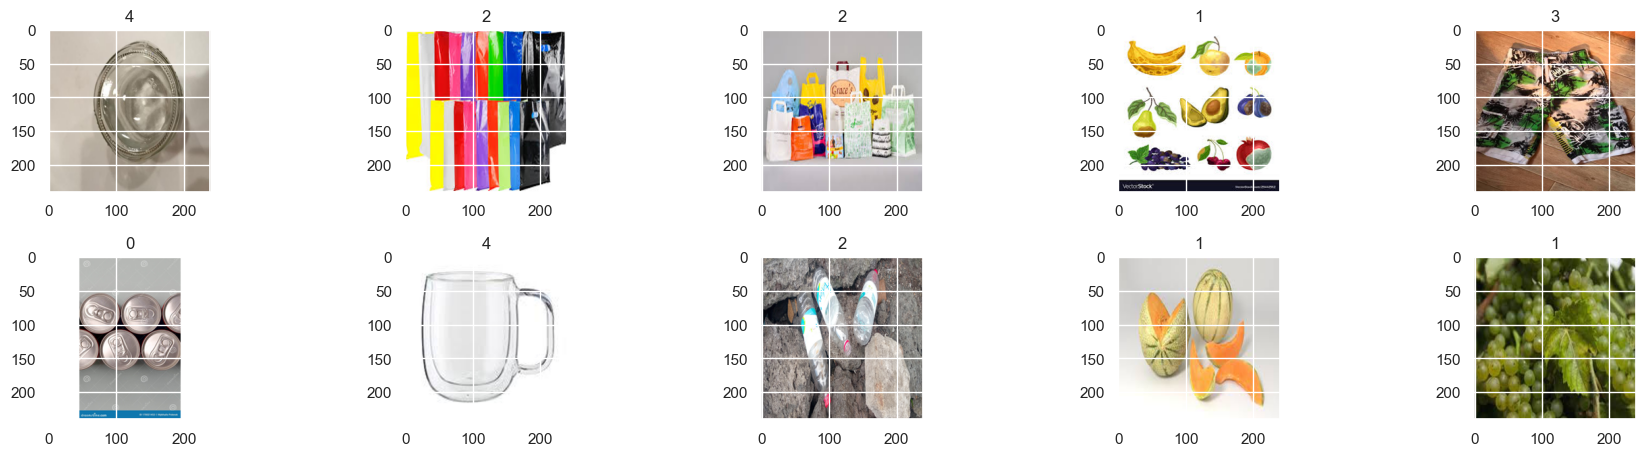

In [17]:
plt.figure(figsize=(18,9))
for i in range(1,11):
    plt.subplot(4,5,i)
    plt.imshow(X_test_t[i])
    plt.title(y_test_t[i])
    plt.tight_layout()
plt.show()

In [36]:
print(f"min = {np.min(X_train_pb)} et max = {np.max(X_train_pb)}")

min = 0 et max = 255


In [37]:
print(f'Train{np.unique(y_train_t,return_counts=True)}')
print(f'Test {np.unique(y_test_t,return_counts=True)}')

Train(array([0, 1, 2, 3, 4], dtype=int32), array([260, 221, 284, 195, 217]))
Test (array([0, 1, 2, 3, 4], dtype=int32), array([69, 87, 86, 55, 65]))


### 5.Importation des bibliothèques(classification)

In [38]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model, Input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Add, BatchNormalization, Input, Flatten

### Création d'une générateur de données

In [39]:
train_datagen = ImageDataGenerator(
    rotation_range=35,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.6, 1.4],
    channel_shift_range=30.0,
    fill_mode='nearest',
    rescale=1./255
)


test_datagen =  ImageDataGenerator(rescale= 1. / 255)

In [50]:
train_generator = train_datagen.flow(X_train_t,y_train_t,batch_size=32)
test_generator  = test_datagen.flow(X_test_t,y_test_t,batch_size=32)

In [ ]:
X_train_aug, y= next(train_generator)

In [ ]:
X_train_aug.shape

In [11]:
X_test_pb = X_test_pb.astype('float32') / 255

In [12]:
X_test_lc = X_test_lc.astype('float32') / 255

In [17]:
X_test_lc.shape

(162, 240, 240, 3)

In [18]:
X_test_pb.shape

(2428, 240, 240, 3)

In [13]:
print(f"min = {np.min(X_test_pb)} et max = {np.max(X_test_pb)}")

min = 0.0 et max = 1.0


In [14]:
print(f"min = {np.min(X_test_lc)} et max = {np.max(X_test_lc)}")

min = 0.0 et max = 1.0


In [ ]:
plt.figure(figsize=(18,9))
for i in range(1,11):
    plt.subplot(4,5,i)
    plt.imshow(X_test[i])
    plt.title(y_test[i])
    plt.tight_layout()
plt.show()

### 6. Configuration des Couches du Réseau de Neurones

In [ ]:
inputs = Input(shape=(240, 240, 3))

# Couches convolutionnelles classiques
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)
#x = layers.Dropout(0.2)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)
#x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)
#x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)
#x = layers.Dropout(0.2)(x)

x = layers.Conv2D(132, (2, 2), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)

# Passage à la phase dense
#x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.3)(x)

x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
#x = layers.Dropout(0.2)(x)

x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
#x = layers.Dropout(0.25)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
#x = layers.Dropout(0.3)(x)

x = layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001))(x)
#x = layers.Dropout(0.2)(x)

x = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)

# Sortie
outputs = layers.Dense(5, activation='softmax')(x)

# Modèle final
model = Model(inputs, outputs)

# Résumé
model.summary()
 

In [15]:
from tensorflow.keras.models import load_model

In [41]:
base_model = load_model("model_cls_13.keras")
x = base_model.layers[-4].output  
x = layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001), name="dense5_1")(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001),name="dense5_")(x)
#x = layers.Dropout(0.2)(x)
new_output = layers.Dense(5, activation="softmax",name="output")(x)  # 5 classes locales
model = Model(inputs=base_model.input, outputs=new_output)
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 240, 240, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 240, 240, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 120, 120, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 120, 120, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 132)         │          67,716 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 15, 15, 132)         │             528 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 132)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6468)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,312,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 3,806,525 (14.52 MB)

 Trainable params: 19,689 (76.91 KB)

 Non-trainable params: 3,786,836 (14.45 MB)

In [ ]:
#keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

### 7. Entrainement du Réseau de Neurones.

In [43]:
from sklearn.utils import class_weight

In [44]:
weights = class_weight.compute_class_weight(class_weight='balanced',
                                             classes=np.unique(y_train_t),
                                             y=y_train_t)
class_weights = dict(enumerate(weights))

In [46]:
class_weights

{0: np.float64(0.9053846153846153),
 1: np.float64(1.065158371040724),
 2: np.float64(0.8288732394366197),
 3: np.float64(1.2071794871794872),
 4: np.float64(1.0847926267281105)}

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8675 - loss: 0.5805
Epoch 1: val_accuracy improved from None to 0.64917, saving model to model_cls_n_13.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8743 - loss: 0.5608 - val_accuracy: 0.6492 - val_loss: 1.0998 - learning_rate: 1.0000e-04
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8944 - loss: 0.4912
Epoch 2: val_accuracy did not improve from 0.64917
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8802 - loss: 0.5328 - val_accuracy: 0.6492 - val_loss: 1.0766 - learning_rate: 1.0000e-04
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8861 - loss: 0.5121
Epoch 3: val_accuracy did not improve from 0.64917
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8811 - loss: 0.5226 - val_accuracy: 0.6492 - val_loss: 1.1030 - learning_rate: 1.0000e-04
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8733 - loss: 0.5456
Epoch 4: val_accuracy did not improve from 

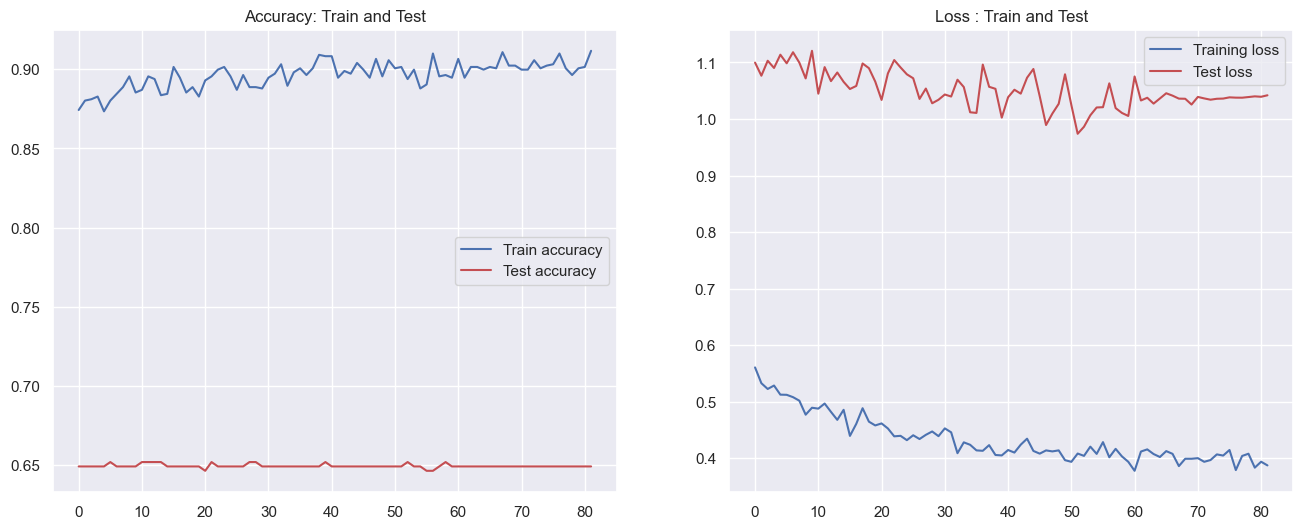

In [51]:
import time
initial_learning_rate = 1e-4
param_surv_app1 = ModelCheckpoint("model_cls_n_13.keras",monitor="val_accuracy",verbose=1,save_best_only=True,mode="auto")
param_surv_app2 = EarlyStopping(monitor='val_loss',patience=30,verbose=1,mode="auto", restore_best_weights=True)
param_surv_app3 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience= 10, verbose=1)
model.compile(optimizer=RMSprop(learning_rate=initial_learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Entrainement du modele
start_time = time.time()
historique = model.fit(train_generator,
                     epochs=200,
                     verbose=1,
                     validation_data=test_generator,
                     class_weight=class_weights,
                     callbacks=[param_surv_app1,param_surv_app2,param_surv_app3])
end_time = time.time()
elapsed = end_time - start_time
days, rem = divmod(elapsed, 86400)          
hours, rem = divmod(rem, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Temps d'entraînement : {int(days)}j {int(hours):02d}h {int(minutes):02d}m {int(seconds):02d}s")

outils.plot_result(historique,name_fig="plot_cls_14",register_plot=False)
model.save("model_cls_n_13.keras")

### 7. Visualisation de l'apprentissage

In [23]:
list_name = ['Can', 'Organic', 'Plastic', 'Textile', 'Glass']

In [ ]:
outils.plot_result(historique,name_fig="plot_cls_6",register=False)

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model_cls_13   = load_model('model_cls_13.keras')

In [19]:
model_cls_14   = load_model('model_cls_14.keras')

In [20]:
model_cls_n_13 = load_model('model_cls_n_13.keras')

In [21]:
model_cls_n_14 = load_model('model_cls_n_14.keras')

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step
========================================== Confusion Matrix =====================================================
[[31  0  2  0  0]
 [ 6  8 12  9  3]
 [ 1  0 44  6  2]
 [ 3  1  1  8  2]
 [ 5  0 12  0  6]]


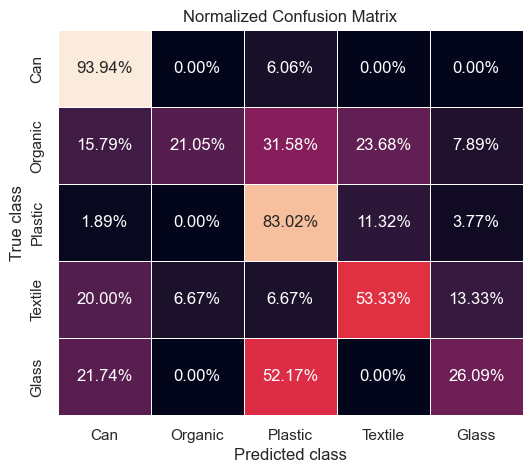

========================================= Detailed Metrics =====================================================
              precision    recall  f1-score   support

         Can     0.6739    0.9394    0.7848        33
     Organic     0.8889    0.2105    0.3404        38
     Plastic     0.6197    0.8302    0.7097        53
     Textile     0.3478    0.5333    0.4211        15
       Glass     0.4615    0.2609    0.3333        23

    accuracy                         0.5988       162
   macro avg     0.5984    0.5549    0.5179       162
weighted avg     0.6463    0.5988    0.5582       162

Macro F1-score (unweighted): 0.5179
Weighted F1-score: 0.5582


In [24]:
y_pred_model_cls_13 = outils.evaluation(model=model_cls_13,X_test=X_test_lc,y_test=y_test_lc,labels=list_name)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step
========================================== Confusion Matrix =====================================================
[[31  0  1  1  0]
 [ 7 15  8  6  2]
 [ 1  1 41  8  2]
 [ 1  3  2  8  1]
 [11  2  6  0  4]]


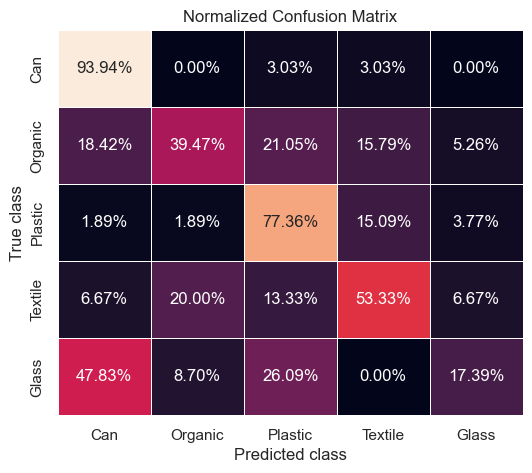

========================================= Detailed Metrics =====================================================
              precision    recall  f1-score   support

         Can     0.6078    0.9394    0.7381        33
     Organic     0.7143    0.3947    0.5085        38
     Plastic     0.7069    0.7736    0.7387        53
     Textile     0.3478    0.5333    0.4211        15
       Glass     0.4444    0.1739    0.2500        23

    accuracy                         0.6111       162
   macro avg     0.5643    0.5630    0.5313       162
weighted avg     0.6179    0.6111    0.5858       162

Macro F1-score (unweighted): 0.5313
Weighted F1-score: 0.5858


In [25]:
y_pred_model_cls_14 = outils.evaluation(model=model_cls_14,X_test=X_test_lc,y_test=y_test_lc,labels=list_name)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step
========================================== Confusion Matrix =====================================================
[[30  0  1  1  1]
 [ 4 20  3  5  6]
 [ 1  2 44  5  1]
 [ 0  4  3  7  1]
 [ 3  7  5  0  8]]


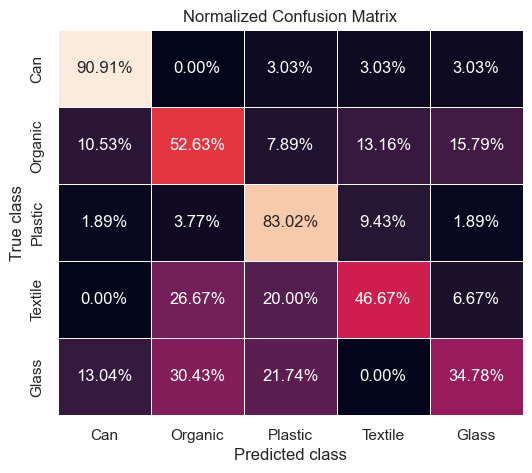

========================================= Detailed Metrics =====================================================
              precision    recall  f1-score   support

         Can     0.7895    0.9091    0.8451        33
     Organic     0.6061    0.5263    0.5634        38
     Plastic     0.7857    0.8302    0.8073        53
     Textile     0.3889    0.4667    0.4242        15
       Glass     0.4706    0.3478    0.4000        23

    accuracy                         0.6728       162
   macro avg     0.6081    0.6160    0.6080       162
weighted avg     0.6629    0.6728    0.6645       162

Macro F1-score (unweighted): 0.6080
Weighted F1-score: 0.6645


In [30]:
y_pred_model_cls_n_13 = outils.evaluation(model=model_cls_n_13,X_test=X_test_lc,y_test=y_test_lc,labels=list_name)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step
========================================== Confusion Matrix =====================================================
[[31  0  1  1  0]
 [ 1 34  2  1  0]
 [ 1  1 43  6  2]
 [ 1  2  0 12  0]
 [ 0  0  3  0 20]]


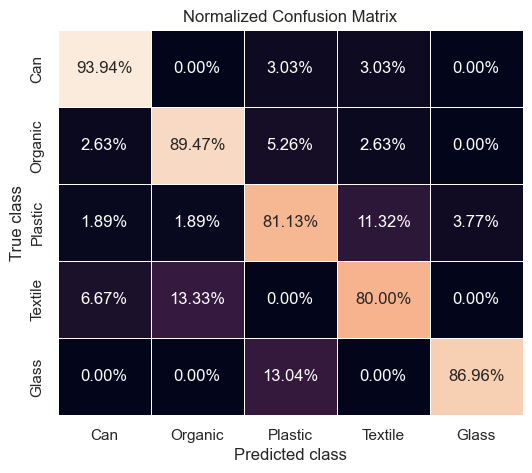

========================================= Detailed Metrics =====================================================
              precision    recall  f1-score   support

         Can     0.9118    0.9394    0.9254        33
     Organic     0.9189    0.8947    0.9067        38
     Plastic     0.8776    0.8113    0.8431        53
     Textile     0.6000    0.8000    0.6857        15
       Glass     0.9091    0.8696    0.8889        23

    accuracy                         0.8642       162
   macro avg     0.8435    0.8630    0.8500       162
weighted avg     0.8730    0.8642    0.8667       162

Macro F1-score (unweighted): 0.8500
Weighted F1-score: 0.8667


In [31]:
y_pred_model_cls_n_14 = outils.evaluation(model=model_cls_n_14,X_test=X_test_lc,y_test=y_test_lc,labels=list_name)

#### 7.1.Enregistrement du modèle

In [ ]:
#model.save("model_cls_6.keras")

### 8. Évaluation du réseau de neurone sur les données de Test

In [ ]:
X_train = X_train.astype('float32') / 255

In [ ]:
print(f"min = {np.min(X_train)} et max {np.max(X_train)}")

In [29]:
outils.evaluation(model=model_13,X_test=X_test_pb, y_test=y_test_pb,labels=list_name)

NameError: name 'model_13' is not defined

76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 379ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 380ms/step
==========  Détails - Modèle 1 ==========
              precision    recall  f1-score   support

         Can     0.8870    0.9027    0.8947       339
     Organic     0.9481    0.9481    0.9481       482
     Plastic     0.8912    0.8785    0.8848       494
     Textile     0.9659    0.9712    0.9686       555
       Glass     0.9406    0.9373    0.9390       558

    accuracy                         0.9304      2428
   macro avg     0.9266    0.9276    0.9270      2428
weighted avg     0.9304    0.9304    0.9304      2428

Total params : 3806525
Accuracy : 0.9304 | F1-macro : 0.9270
Prediction time : 34.46s | FPS : 70.47

==========  Détails - Modèle 2 ==========
              precision    recall  f1-score   support

         Can     0.9115    0.9115    0.9115       339
     Organic     0.9333    0.9585    0.9458       482
     Plastic     0.9097    0.8765    0.8928       494
     Textile     0.9454  

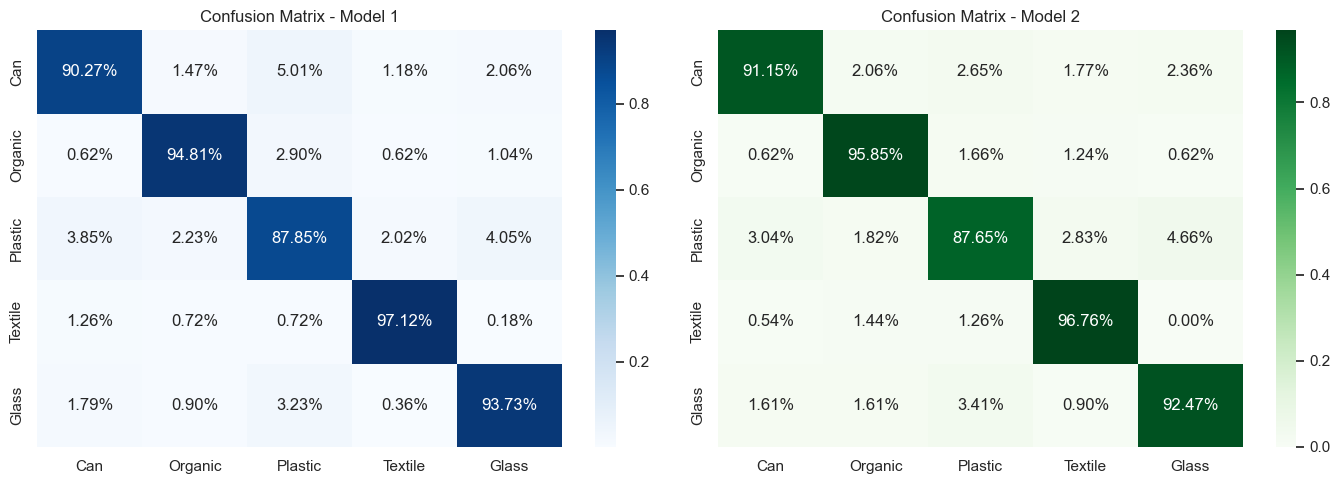


==========  Résumé comparatif ==========
                   | Model 1      | Model 2     
Accuracy           | 0.9304       | 0.9296      
Macro F1-score     | 0.9270       | 0.9276      
Params             | 3806525      | 562493      
Time (s)           | 34.46        | 29.90       
FPS                | 70.47        | 81.21       


In [19]:
outils.compare_models_full(model_13,model_14,X_test_pb, y_test_pb, class_names=list_name)

In [ ]:
#outils.predict(image_path1,model,target_size=225,list_name=list_name)
X_test[9].shape